# **Exercise 1: Classifying Loan Status Using Decision Trees**

In [155]:
from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data.csv


In [157]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score
from sklearn.impute import SimpleImputer

df = pd.read_csv(list(uploaded.keys())[0])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None


In [158]:
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

In [159]:
categorical_features = ['purpose']
numerical_features = X.columns.difference(categorical_features)

In [160]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [161]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features), ('cat', categorical_transformer, categorical_features)
        ])

In [162]:
model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))])

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['credit.policy', 'days.with.cr.line', 'delinq.2yrs', 'dti', 'fico',
       'inq.last.6mths', 'installment', 'int.rate', 'log.annual.inc',
       'pub.rec', 'revol.bal', 'revol.util'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['purpose'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [164]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [165]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7299930410577592
ROC-AUC: 0.5169713259093437
Confusion Matrix:
 [[2004  404]
 [ 372   94]]


# **Exercise 2: Predicting Hospital Readmission Using Logistic Regression**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving hospital_readmissions.csv to hospital_readmissions.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score

df = pd.read_csv(list(uploaded.keys())[0])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [3]:
X = df.drop('readmitted', axis=1)
y = df['readmitted']

In [4]:
# Preprocessing
num_feature = X.select_dtypes(include=['int64', 'float64']).columns
categorical_feature = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_feature),
        ('cat', OneHotEncoder(), categorical_feature)
    ])

In [5]:
pipeline = Pipeline(steps=[ ('preprocessor', preprocessor), ('classifier', LogisticRegression() ) ])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
       'n_outpatient', 'n_inpatient', 'n_emergency'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [8]:
y_pred = pipeline.predict(X_test)

# Evaluate Model
precision = precision_score(y_test, y_pred, pos_label='yes')
recall = recall_score(y_test, y_pred, pos_label='yes')
f1 = f1_score(y_test, y_pred, pos_label='yes')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.6269430051813472
Recall: 0.41332194705380015
F1 Score: 0.49819866186309836


# **Exercise 3: Classifying Digit Images Using Decision Trees**

In [9]:
from google.colab import files
uploaded = files.upload()

Saving mnist_dataset.csv to mnist_dataset.csv


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(list(uploaded.keys())[0])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB
None


In [14]:
# Assuming labels are in first column
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

In [15]:
# Normalize pixel values
X = X / 255.0

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Implement Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)

Accuracy: 1.0


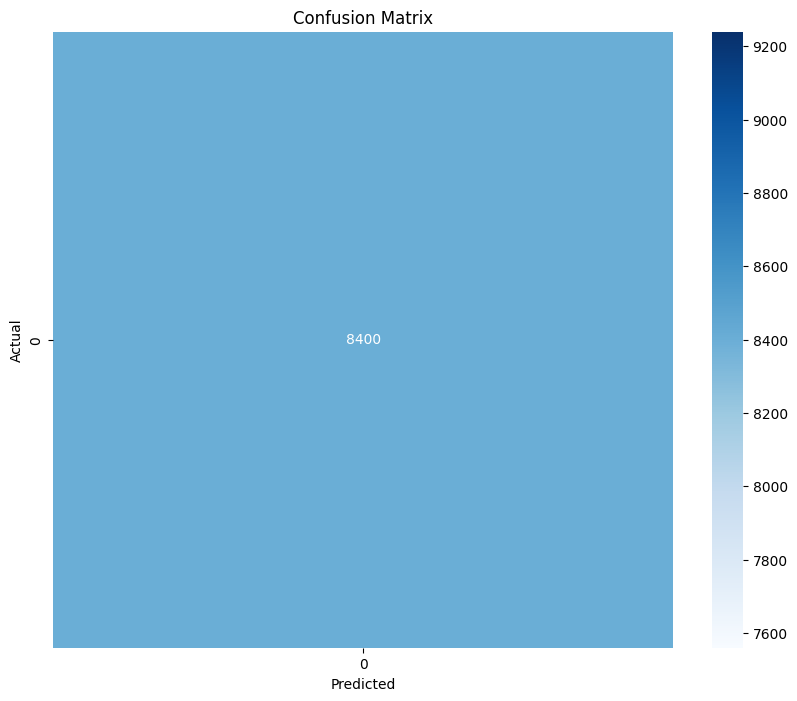

In [21]:
print(f"Accuracy: {accuracy}")

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Execise 4: Predicting Loan Approval Using Logistic Regression**

In [22]:
from google.colab import files
uploaded = files.upload()

Saving loan_approval_dataset.csv to loan_approval_dataset.csv


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv(list(uploaded.keys())[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [26]:
print(df.head())
print(df.columns)

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [28]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

In [29]:
# Define features and target
X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

In [30]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [31]:
preprocessor = ColumnTransformer(transformers=[ ('num', StandardScaler(), numeric_features), ('cat', OneHotEncoder(), categorical_features) ])

In [32]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=1000)) ])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.905152224824356
Confusion Matrix:
[[498  38]
 [ 43 275]]


# **Exercise 5: Classifying Wine Quality Using Decision Trees**

In [58]:
from google.colab import files
uploaded = files.upload()

Saving Wine.csv to Wine (1).csv


In [106]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import class_weight

df = pd.read_csv(list(uploaded.keys())[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [107]:
print (df.head())
print (df.columns)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [94]:
# Handle Missing Values if any
df = df.fillna(df.median(numeric_only=True))

df.drop(columns=['Id'], inplace=True)

In [108]:
X = df.drop('quality', axis=1)
y = df['quality']

In [109]:
# Ensure the target has multiple classes
print(f"Classes in target: {y.value_counts()}")

Classes in target: quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


In [110]:
numeric_features = X.columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

In [111]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [113]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Id'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

In [114]:
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)

In [115]:
n_classes = len(y.unique())
y_test_bin = label_binarize(y_test, classes=range(n_classes))

In [116]:
# Check if y_test_bin contains more than one class
if y_test_bin.sum(axis=0).min() > 0 and y_prob.shape[1] > 1:
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')

    print(f"Accuracy: {accuracy:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
else:
    print("Error: The test set contains only one class or model does not predict more than one class. ROC AUC cannot be computed.")

Error: The test set contains only one class or model does not predict more than one class. ROC AUC cannot be computed.
